<a href="https://colab.research.google.com/github/toddwalters/aiml-python-coding-examples/blob/main/capstone/projects/historicalStructureClassification/1703138137_ToddWalters_project_historicalStructureClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Table of Contents

-----

# <a id='toc1_'></a>[**Historical Structure Classification Project**](#toc0_)

-----------------------------
## <a id='toc1_1_'></a>[**Project Context**](#toc0_)
-----------------------------

This project is part of an AIML Capstone and focuses on two main aspects:
1. Classifying historical structures using deep learning techniques
2. Developing a recommendation engine for tourism

The project aims to assist the travel and tourism industries by monitoring the condition of historical structures and providing personalized recommendations to tourists.

-----------------------------
## <a id='toc1_2_'></a>[**Project Objectives**](#toc0_)
-----------------------------

1. Develop a CNN model to classify historical structures from images
2. Perform exploratory data analysis on tourism data
3. Create a recommendation engine for tourist attractions

-----------------------------
## <a id='toc1_3_'></a>[**Project Dataset Description**](#toc0_)
-----------------------------

**Part 1: Image Classification**

1. **Structures_dataset.zip**: Training set of images of historical structures
2. **dataset_test**: Test set of images of historical structures

**Part 2: Tourism Recommendation**

1. **user.csv**: User demographic data
   - Columns: User_id, location, age
2. **tourism_with_id.csv**: Details on tourist attractions in Indonesia's five largest cities
   - Columns: Place_id, Place_name, Description, Category, City, Price, Rating, Time_minute, Coordinate, Lat, Long
3. **tourism_rating.csv**: User ratings for tourist attractions
   - Columns: user_id, place_id, place_rating

-----------------------------------
## <a id='toc1_4_'></a>[**Project Analysis Steps To Perform**](#toc0_)
-----------------------------------


**Part 1 - Deep Learning**

1. Plot the sample images (8–10) from each class or category to gain a better understanding
of each class
   > Hint: You can use the OpenCV open-source library for this task.
2. Select an CNN ptm_name of your choice to train the CV model. Configure the
ptm_name for transfer learning, set up a TensorFlow environment for the selected
backbone ptm_name, and load pre-trained weights
   > Note: Algorithm or ptm_name selection is an important step in the training of ML models,
so select the one that performs the best on your dataset.
3. Deep learning models tend to work well with large amounts (millions of images) of data, but
we may not always have enough data to train a deep learning model from scratch. Transfer
learning techniques allow us to train and fine-tune large deep learning ptm_names using
limited data.
   > Hint: For transfer learning, use pre-trained CNN weights and freeze all convolutional
layers' weights.
4. As of now, CNN ptm_name has been configured for our model. Modify the top of this
ptm_name to work with our dataset by:
• Adding an appropriate number of dense layers with an activation function.
• Using dropout for regularization.
   > Note: It is important to understand that these parameters are hyperparameters that
must be tuned.
5. Compile the model with the right set of parameters like optimizer, loss function, and metric
6. Define your callback class to stop the training once validation accuracy reaches a certain
number of your choice
7. Setup the train or test dataset directories and review the number of image samples for the train
and test datasets for each class
8. Train the model without augmentation while continuously monitoring the validation accuracy
9. Train the model with augmentation and keep monitoring validation accuracy
   > Note: Choose carefully the number of epochs, steps per epoch, and validation steps based on
your computer configuration
10. Visualize training and validation accuracy on the y-axis against each epoch on the x-axis to
see if the model overfits after a certain epoch
Deep learning

**Part 2 - Data Science**

1. Import all the datasets and perform preliminary inspections, such as:
   1. Check for missing values and duplicates
   2. Remove any anomalies found in the data
2. To understand the tourism highlights better, we should explore the data in depth.
   1. Explore the user group that provides the tourism ratings by:
      - Analyzing the age distribution of users visiting the places and rating them
      - Identifying the places where most of these users (tourists) are coming from
3. Next, let's explore the locations and categories of tourist spots.
   1. What are the different categories of tourist spots?
   2. What kind of tourism each location is most famous or suitable for?
   3. Which city would be best for a nature enthusiast to visit?
4. To better understand tourism, we need to create a combined data with places and their user ratings.
   1. Use this data to figure out the spots that are most loved by the tourists. Also, which city
has the most loved tourist spots?
   2. Indonesia provides a wide range of tourist spots ranging from historical and cultural
beauties to advanced amusement parks. Among these, which category of places are users
liking the most?
5. Build a recommender model for the system
   1. Use the above data to develop a collaborative filtering model for recommendation and
use that to recommend other places to visit using the current tourist location(place name)



### <a id='toc1_4_1_'></a>[**Part 1 - Deep Learning**](#toc0_)

#### <a id='toc1_4_1_1_'></a>[**Import Modules and Set Default Environment Variables**](#toc0_)

In [ ]:
import gc
import math
import multiprocessing
import os
import time
import warnings
from concurrent.futures import ThreadPoolExecutor

import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image
from sklearn.utils.class_weight import compute_class_weight
from keras import backend as K
from keras.applications import (EfficientNetB0, InceptionV3, MobileNetV2, ResNet50V2, VGG16)
from keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from keras.applications.inception_v3 import preprocess_input as inception_preprocess
from keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from keras.applications.resnet_v2 import preprocess_input as resnet_preprocess
from keras.applications.vgg16 import preprocess_input as vgg_preprocess
from keras.callbacks import (Callback, EarlyStopping, LambdaCallback, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau)
from keras.layers import (BatchNormalization, Dense, Dropout, GlobalAveragePooling2D, Input)
from keras.models import Model
from keras.optimizers import Adam
from keras.optimizers.schedules import ExponentialDecay
from keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import image_dataset_from_directory
from keras.utils import Sequence
warnings.filterwarnings("ignore")

# Enable if having issues with Tensorflow
# os.environ['TF_DISABLE_GRAPPLER'] = '1'

# Load the environment variables
# load_dotenv(verbose=True, dotenv_path='.env', override=True)
# DATASET_PATH = f'{DATASET_PATH}/structures_dataset'

# Uncomment when using Google Colab and Mounting Google Drive
DATASET_PATH = '/home/sagemaker-user/dataset/'

# Mount Google Drive if using Colab
# try:
#     from google.colab import drive
#     drive.mount('/content/drive')
#     DATASET_PATH = '/content/drive/MyDrive/Colab Notebooks/datasets/1703138137_dataset/part_1/dataset_hist_structures'
# except ImportError:
#     DATASET_PATH = '/Users/toddwalters/Library/CloudStorage/GoogleDrive-toddw4271@gmail.com/My Drive/Colab Notebooks/datasets/1703138137_dataset/part_1/dataset_hist_structures'

# Check TensorFlow Verision
print()
print(f"TensorFlow version: {tf.__version__}")
print(f"Eager execution: {tf.executing_eagerly()}")
print()


#### <a id='toc1_4_1_1_'></a>[**Look for corrupt files**](#toc0_)

In [ ]:
def verify_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                file_path = os.path.join(root, file)
                try:
                    img = Image.open(file_path) # open the image file
                    img.verify() # verify that it is, in fact an image
                except (IOError, SyntaxError) as e:
                    print(f'Bad file: {file_path}') # print out the names of corrupt files
                    os.remove(file_path)
                    print(f'Deleted bad file: {file_path}')

# verify_images(f'{DATASET_PATH}/dataset_test')
# verify_images(f'{DATASET_PATH}/structure_dataset')

#### <a id='toc1_4_1_1_'></a>[**Rename Files**](#toc0_)

In [ ]:
import os
import uuid
import random
import string

def random_string(length):
    """Generate a random string of fixed length"""
    letters = string.ascii_lowercase + string.digits
    return ''.join(random.choice(letters) for i in range(length))

def rename_files(directory):
    for root, dirs, files in os.walk(directory):
        for filename in files:
            # Generate a unique name
            new_name = str(uuid.uuid4())

            # Get the file extension
            file_extension = os.path.splitext(filename)[1]

            # Create the new filename
            new_filename = f"{new_name}.jpg"

            # Full paths
            old_file = os.path.join(root, filename)
            new_file = os.path.join(root, new_filename)

            # Rename the file
            os.rename(old_file, new_file)
            print(f"Renamed: {filename} -> {new_filename}")

# Uncomment if you want to rename all of the files in the dataset
#
# Specify the directory to start from
# start_directory = f'{DATASET_PATH}/structures_dataset'
# Run the function
# rename_files(start_directory)
# Specify the directory to start from
# start_directory = f'{DATASET_PATH}/dataset_test'
# # Run the function
# rename_files(start_directory)

#### <a id='toc1_4_1_1_'></a>[**Plot The Sample Images**](#toc0_)

In [ ]:
def plot_sample_images(dataset_path, num_samples=8):
    classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
    fig, axes = plt.subplots(len(classes), num_samples, figsize=(20, 4*len(classes)))

    for i, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))][:num_samples]

        for j, image_name in enumerate(images):
            image_path = os.path.join(class_path, image_name)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')

        # Set the class name as the title for the first image in the row
        axes[i, 0].set_title(class_name, fontsize=16, pad=20)

    plt.tight_layout()
    plt.show()

plot_sample_images(f'{DATASET_PATH}/structures_dataset')

**Explanations:**

- This code defines a function `plot_sample_images` that takes a dataset path and plots a specified number of sample images from each class. It uses OpenCV to read the images and matplotlib to display them in a grid.

**Why It Is Important:**

- Visualizing sample images from each class helps us understand the nature of the data we're working with. It allows us to identify any potential issues with the images, such as inconsistent sizes, color schemes, or quality. This step is crucial for determining if any preprocessing steps are needed before training the model.

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### <a id='toc1_4_1_1_'></a>[**Define Utility Functions and Classes**](#toc0_)

In [ ]:
# Define utility functions and classes
class DataGenerator(Sequence):
    def __init__(self, generator, steps_per_epoch):
        self.generator = generator
        self.steps_per_epoch = steps_per_epoch

    def __len__(self):
        return self.steps_per_epoch

    def __getitem__(self, index):
        return next(self.generator)

    def on_epoch_end(self):
        self.generator.reset()

class DebugCallback(Callback):
    def on_epoch_begin(self, epoch, logs=None):
        print(f"\nStarting epoch {epoch + 1}")

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        train_accuracy = logs.get('accuracy', 'N/A')
        val_accuracy = logs.get('val_accuracy', 'N/A')

        train_accuracy_str = f"{train_accuracy:.4f}" if isinstance(train_accuracy, float) else str(train_accuracy)
        val_accuracy_str = f"{val_accuracy:.4f}" if isinstance(val_accuracy, float) else str(val_accuracy)

        print(f"Epoch {epoch + 1} - Train accuracy: {train_accuracy_str}")
        print(f"Epoch {epoch + 1} - Val accuracy: {val_accuracy_str}")

    def on_train_batch_end(self, batch, logs=None):
        logs = logs or {}
        if batch % 100 == 0:
            loss = logs.get('loss', 'N/A')
            loss_str = f"{loss:.4f}" if isinstance(loss, float) else str(loss)
            print(f"Batch {batch} - Loss: {loss_str}")

class DatasetLogger(Callback):
    def __init__(self, train_dataset, test_dataset):
        super().__init__()
        self.train_dataset = train_dataset
        self.test_dataset = test_dataset

    def on_epoch_begin(self, epoch, logs=None):
        print(f"\nStarting epoch {epoch + 1}")
        print(f"Epoch {epoch + 1} - Train samples: {tf.data.experimental.cardinality(self.train_dataset).numpy()}")
        print(f"Epoch {epoch + 1} - Test samples: {tf.data.experimental.cardinality(self.test_dataset).numpy()}")

class CustomValidationCallback(Callback):
    def __init__(self, validation_data, validation_steps):
        super().__init__()
        self.validation_data = validation_data
        self.validation_steps = validation_steps

    def on_epoch_end(self, epoch, logs=None):
        evaluation = self.model.evaluate(self.validation_data, steps=self.validation_steps, verbose=0)
        print(f"\nEpoch {epoch + 1} - Custom validation:")
        print(f"Loss: {evaluation[0]:.4f}")
        print(f"Accuracy: {evaluation[1]:.4f}")


def count_samples(dataset_path):
    class_counts = {}
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

def create_data_generators(train_path, test_path, batch_size=32):
    train_dataset = image_dataset_from_directory(
        train_path,
        image_size=(224, 224),
        batch_size=batch_size,
        label_mode='categorical',
        shuffle=True
    )

    test_dataset = image_dataset_from_directory(
        test_path,
        image_size=(224, 224),
        batch_size=batch_size,
        label_mode='categorical',
        shuffle=False
    )

    # Get class names before applying normalization
    class_names = train_dataset.class_names

    # Rescale the pixel values
    normalization_layer = tf.keras.layers.Rescaling(1./255)
    train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
    test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

    # Calculate steps per epoch
    steps_per_epoch = tf.data.experimental.cardinality(train_dataset).numpy()
    validation_steps = tf.data.experimental.cardinality(test_dataset).numpy()

    # Get classes
    classes = np.concatenate([y for x, y in train_dataset], axis=0)
    classes = np.argmax(classes, axis=1)

    return train_dataset, test_dataset, steps_per_epoch, validation_steps, classes, class_names

def verify_dataset(train_dataset, test_dataset, batch_size, steps_per_epoch):
    print("Verifying dataset...")

    # 1. Print dataset information
    print(f"Train dataset cardinality: {tf.data.experimental.cardinality(train_dataset)}")
    print(f"Test dataset cardinality: {tf.data.experimental.cardinality(test_dataset)}")

    # 2. Inspect a few batches
    print("\nInspecting batches:")
    for i, (images, labels) in enumerate(train_dataset.take(10)):
        print(f"Batch {i+1}:")
        print(f"  Image batch shape: {images.shape}")
        print(f"  Label batch shape: {labels.shape}")
        print(f"  Image min-max values: {tf.reduce_min(images).numpy()} - {tf.reduce_max(images).numpy()}")
        print(f"  Unique labels: {np.unique(labels.numpy())}")
        print("---")

    # 3. Check dataset configuration
    print("\nDataset configuration:")
    print(f"Train dataset: {train_dataset}")
    print(f"Test dataset: {test_dataset}")

    # 4. Verify steps per epoch
    total_train_samples = tf.data.experimental.cardinality(train_dataset).numpy() * batch_size
    calculated_steps = total_train_samples // batch_size
    print(f"\nCalculated steps per epoch: {calculated_steps}")
    print(f"Provided steps per epoch: {steps_per_epoch}")
    assert calculated_steps == steps_per_epoch, "Steps per epoch mismatch"

    # 5. Test complete iteration
    print("\nTesting complete iteration:")
    for epoch in range(5):
        print(f"Epoch {epoch + 1}")
        for step, (images, labels) in enumerate(train_dataset):
            if step % 100 == 0:
                print(f"  Step {step}: images shape {images.shape}, labels shape {labels.shape}")
            if step >= steps_per_epoch:
                break

    # 6. Check for data leakage
    print("\nChecking for data leakage...")
    train_sample = next(iter(train_dataset.take(100)))[0][0]
    for test_batch in test_dataset.take(100):
        assert not np.array_equal(train_sample, test_batch[0][0]), "Data leakage detected"
    print("No data leakage detected")

    # 7. Verify data augmentation (if applicable)
    # Uncomment and modify this section if you're using data augmentation
    """
    print("\nVerifying data augmentation:")
    for original, augmented in zip(train_dataset.take(1), train_dataset.map(augmentation_function).take(1)):
        plt.figure(figsize=(10, 5))
        plt.subplot(121)
        plt.imshow(original[0][0])
        plt.title("Original")
        plt.subplot(122)
        plt.imshow(augmented[0][0])
        plt.title("Augmented")
        plt.show()
    """

    print("\nDataset verification complete.")

#### <a id='toc1_4_1_2_'></a>[**Select an CNN ptm_name**](#toc0_)

In [ ]:
def create_model(num_classes):
    # base_model = ResNet50V2(weights='imagenet', include_top=False, ptm_input_shape=(128, 128, 3))
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # inputs = Input(shape=(128, 128, 3))
    inputs = Input(shape=(224, 224, 3))
    # x = CustomAugmentationLayer()(inputs)
    x = base_model(inputs)
    x = BatchNormalization()(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = Dropout(0.5)(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)

    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=output)
    return model

**Explanations:**

- This code defines a function `create_model` that creates a CNN using transfer learning. It uses ResNet50 as the base model with pre-trained ImageNet weights. The base model layers are frozen, and custom dense layers are added on top for fine-tuning.

**Why It Is Important:**

- Transfer learning allows us to leverage pre-trained models on large datasets, which is particularly useful when we have limited data. By using a pre-trained model as a feature extractor and adding custom layers, we can adapt the model to our specific classification task while benefiting from the general features learned by the base model.

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### <a id='toc1_4_1_3_'></a>[**Compile The Model**](#toc0_)

In [ ]:
def compile_model(model):
    initial_learning_rate = 0.001
    lr_schedule = ExponentialDecay(
        initial_learning_rate,
        # decay_steps=1000,
        decay_steps=100,
        decay_rate=0.96,
        staircase=True)

    optimizer = Adam(learning_rate=lr_schedule)

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

**Explanations:**

- This code defines a function `compile_model` that compiles the model with the Adam optimizer, categorical crossentropy loss function, and accuracy metric.

**Why It Is Important:**

- Compiling the model is a crucial step that defines how the model will be trained. The choice of optimizer, loss function, and metrics affects the training process and the model's performance. Categorical crossentropy is appropriate for multi-class classification tasks, and accuracy provides a clear measure of the model's performance.

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### <a id='toc1_4_2_'></a>[**Define Callback Class**](#toc0_)

In [ ]:
class AccuracyCallback(Callback):
    def __init__(self, target_accuracy):
        super().__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        accuracy = logs.get('accuracy', 'N/A')
        accuracy_str = f"{accuracy:.4f}" if isinstance(accuracy, float) else str(accuracy)
        print(f"Epoch {epoch + 1} - Accuracy: {accuracy_str}")
        if isinstance(accuracy, float) and accuracy >= self.target_accuracy:
            print(f"Reached target accuracy of {self.target_accuracy}")
            self.model.stop_training = True

**Explanations:**

- This code defines a custom callback class `AccuracyCallback` that stops the training when a target validation accuracy is reached.

**Why It Is Important:**

- Callbacks allow us to customize the training process. In this case, we're using a callback to prevent overfitting by stopping the training once we've reached a satisfactory level of validation accuracy. This helps us avoid wasting computational resources and reduces the risk of the model memorizing the training data.

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### <a id='toc1_4_2_1_'></a>[**Set Up Dataset Directories And Review Sample Numbers**](#toc0_)

In [ ]:
# Setup Dataset Directories
train_path = f'{DATASET_PATH}/structures_dataset'
test_path = f'{DATASET_PATH}/dataset_test'

# Set up data generators first to get class information
batch_size = 32
train_generator, test_generator, steps_per_epoch, validation_steps, classes, class_names = create_data_generators(train_path, test_path, batch_size)

# Now we can use class_names for our existing count_samples function
train_counts = count_samples(train_path)
test_counts = count_samples(test_path)

print("\nTraining samples per class:")
for class_name, count in sorted(train_counts.items()):
    print(f"{class_name}: {count}")
print("\nTest samples per class:")
for class_name, count in sorted(test_counts.items()):
    print(f"{class_name}: {count}")
print()

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(classes), y=classes)
class_weight_dict = dict(enumerate(class_weights))

# Print class weights
print("Class weights:")
for i, weight in enumerate(class_weights):
    print(f"Class {i} ({class_names[i]}): {weight}")
print()

# Create and compile the model
num_classes = len(class_names)
model = create_model(num_classes)
print(model.summary())
compiled_model = compile_model(model)

print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")
print()

**Explanations:**

- This code defines a function `count_samples` that counts the number of samples in each class for a given dataset. It then applies this function to both the training and test datasets and prints the results.

**Why It Is Important:**

- Understanding the distribution of samples across classes is crucial for several reasons:

    1. It helps identify any class imbalance issues that may need to be addressed.
    2. It ensures we have enough samples in each class for both training and testing.
    3. It helps in setting appropriate batch sizes and steps per epoch during training.

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### <a id='toc1_4_2_2_'></a>[**Train The Model Without Augmentation**](#toc0_)

In [ ]:
# Main execution
if __name__ == "__main__":
    # Setup Dataset Directories
    train_path = f'{DATASET_PATH}/structures_dataset'
    test_path = f'{DATASET_PATH}/dataset_test'

    # Set up data generators first to get class information
    batch_size = 32
    train_dataset, test_dataset, steps_per_epoch, validation_steps, classes, class_names = create_data_generators(train_path, test_path, batch_size)

    # Verify the dataset
    verify_dataset(train_dataset, test_dataset, batch_size, steps_per_epoch)

    # Set up callbacks
    accuracy_callback = AccuracyCallback(target_accuracy=0.95)
    debug_callback = DebugCallback()
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    dataset_logger = DatasetLogger(train_dataset, test_dataset)
    custom_validation = CustomValidationCallback(test_dataset, validation_steps)


    # Compute class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(classes), y=classes)
    class_weight_dict = dict(enumerate(class_weights))

    try:
        # Separate evaluation before training
        model.summary()
        print()
        print("Evaluating model before training:")
        evaluation = compiled_model.evaluate(test_dataset, steps=validation_steps)
        print(f"Initial evaluation: {evaluation}")
        print()

        # Training
        history = compiled_model.fit(
            train_dataset,
            steps_per_epoch=steps_per_epoch,
            epochs=20,
            validation_data=test_dataset,
            validation_steps=validation_steps,
            callbacks=[early_stopping, debug_callback, dataset_logger, custom_validation, accuracy_callback],
            class_weight=class_weight_dict,
            verbose=1
        )

        # Final evaluation
        print()
        print("Final evaluation:")
        print("-----------------")
        final_evaluation = compiled_model.evaluate(test_dataset, steps=validation_steps)
        print()
        print(f"Final evaluation: {final_evaluation}")
        print()

        # Plot training history
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    except tf.errors.ResourceExhaustedError:
        print()
        print("Memory error occurred. Try reducing batch size or image dimensions.")
        print()
    except Exception as e:
        print()
        print(f"An error occurred during training: {str(e)}")
        print()
        import traceback
        traceback.print_exc()

**Explanations:**

- This code sets up data generators for the training and test datasets, then trains the model using these generators. The `ImageDataGenerator` is used to load and preprocess images in batches, which is memory-efficient for large datasets.

**Why It Is Important:**

- Training the model without augmentation provides a baseline performance. It allows us to see how well the model performs with the original data before applying any data augmentation techniques. This step is crucial for understanding if the model has enough capacity to learn from the data and if there are any immediate issues like overfitting or underfitting.

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### <a id='toc1_4_2_3_'></a>[**Train The Model With Augmentation**](#toc0_)

In [2]:
!pip install python-dotenv

In [4]:
# v1 - WORKS DO NOT CHANGE
#
import gc
import math
import os
import yaml
import logging
import warnings
import traceback
from collections import Counter
from dotenv import load_dotenv

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image
from sklearn.utils.class_weight import compute_class_weight
import keras.backend as K
from keras.applications import (
    EfficientNetB0,
    InceptionV3,
    MobileNetV2,
    ResNet50V2,
    VGG16
)
from keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from keras.applications.inception_v3 import preprocess_input as inception_preprocess
from keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from keras.applications.resnet_v2 import preprocess_input as resnet_preprocess
from keras.applications.vgg16 import preprocess_input as vgg_preprocess
from keras.callbacks import (
    Callback,
    EarlyStopping,
    LambdaCallback,
    LearningRateScheduler,
    ModelCheckpoint,
    ReduceLROnPlateau
)
from keras.layers import (
    BatchNormalization,
    Dense,
    Dropout,
    GlobalAveragePooling2D,
    Input
)
from keras.models import Model
from keras.optimizers import Adam
from keras.optimizers.schedules import ExponentialDecay
from keras.utils import Sequence
from keras.metrics import Precision, Recall, AUC
from keras.preprocessing import image

# Clear any existing TensorFlow session
tf.keras.backend.clear_session()

# To ignore warnings
warnings.filterwarnings("ignore")

# Set logging level to DEBUG for detailed output
logging.basicConfig(level=logging.DEBUG)

# Define mappings for architectures and preprocessing functions
ARCHITECTURES = {
    'ResNet50V2': ResNet50V2,
    'VGG16': VGG16,
    'InceptionV3': InceptionV3,
    'MobileNetV2': MobileNetV2,
    'EfficientNetB0': EfficientNetB0
}

PREPROCESSING_FUNCTIONS = {
    'resnet_preprocess': resnet_preprocess,
    'vgg_preprocess': vgg_preprocess,
    'inception_preprocess': inception_preprocess,
    'mobilenet_preprocess': mobilenet_preprocess,
    'efficientnet_preprocess': efficientnet_preprocess
}

# Define metrics mapping
METRICS = {
    'Precision': Precision(name='precision'),
    'Recall': Recall(name='recall'),
    'AUC': AUC(name='auc')
}

class AccuracyCallback(Callback):
    def __init__(self, target_accuracy):
        super().__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') >= self.target_accuracy:
            print(f"\nReached {self.target_accuracy*100}% validation accuracy. Stopping training.")
            print()
            print("--------------------")
            print()
            self.model.stop_training = True

class CustomValidationCallback(Callback):
    def __init__(self, validation_data, validation_steps):
        super().__init__()
        self.validation_data = validation_data
        self.validation_steps = validation_steps

    def on_epoch_end(self, epoch, logs=None):
        val_loss = 0
        val_accuracy = 0
        for x, y in self.validation_data.take(self.validation_steps):
            val_metrics = self.model.test_on_batch(x, y)
            val_loss += val_metrics[0]
            val_accuracy += val_metrics[1]

        val_loss /= self.validation_steps
        val_accuracy /= self.validation_steps

        logs['val_loss'] = val_loss
        logs['val_accuracy'] = val_accuracy
        logging.debug(f"\nEpoch {epoch + 1} - Custom validation:")
        logging.debug(f"Loss: {val_loss:.4f}")
        logging.debug(f"Accuracy: {val_accuracy:.4f}")

class LearningRateTracker(Callback):
    def __init__(self):
        super().__init__()
        self.learning_rates = []

    def on_epoch_end(self, epoch, logs=None):
        # Retrieve the learning rate from the learning rate schedule in the optimizer
        optimizer = self.model.optimizer
        if isinstance(optimizer.learning_rate, tf.keras.optimizers.schedules.LearningRateSchedule):
            # If a LearningRateSchedule is used, call it with the current step
            lr = optimizer.learning_rate(optimizer.iterations).numpy()
        else:
            # If a static learning rate is used
            lr = optimizer.learning_rate.numpy()

        self.learning_rates.append(lr)
        logging.debug(f"Epoch {epoch + 1} - Learning rate: {lr}")

class DatasetLogger(Callback):
    def __init__(self, train_dataset, val_dataset):
        super().__init__()
        self.train_dataset = train_dataset
        self.val_dataset = val_dataset

    def on_epoch_begin(self, epoch, logs=None):
        logging.debug(f"\nEpoch {epoch + 1} - Train samples: {tf.data.experimental.cardinality(self.train_dataset)}")
        logging.debug(f"Epoch {epoch + 1} - Val samples: {tf.data.experimental.cardinality(self.val_dataset)}")

    def on_epoch_end(self, epoch, logs=None):
        if logs is not None:
            logging.debug(f"\nEpoch {epoch + 1} - Train accuracy: {logs.get('accuracy', 'N/A'):.4f}")
            logging.debug(f"Epoch {epoch + 1} - Val accuracy: {logs.get('val_accuracy', 'N/A'):.4f}")

class DebugCallback(Callback):
    def on_epoch_begin(self, epoch, logs=None):
        logging.debug(f"\nStarting epoch {epoch + 1}\n")

    def on_batch_begin(self, batch, logs=None):
        if batch % 50 == 0:
            logging.debug(f"\nStarting batch {batch}\n")

    def on_epoch_end(self, epoch, logs=None):
        logging.debug(f"\nEnd of epoch {epoch + 1}\n")
        if logs:
            for key, value in logs.items():
                logging.debug(f"{key}: {value}")
        logging.debug("\n--------------------\n")

class CustomAugmentationLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(CustomAugmentationLayer, self).__init__(**kwargs)

    def call(self, inputs, training=None):
        if training:
            augmented = tf.image.random_contrast(inputs, lower=0.8, upper=1.2)
            augmented = tf.image.random_saturation(augmented, lower=0.8, upper=1.2)
            return augmented
        return inputs

class DataGenerator:
    def __init__(self, config):
        self.train_path = config['data']['train_path']
        self.test_path = config['data']['test_path']
        self.batch_size = config['data']['batch_size']
        self.target_size = tuple(config['data']['target_size'])
        self.preprocessing_function = PREPROCESSING_FUNCTIONS[config['data']['preprocessing_function']]
        self.augmentation_params = config['augmentation']

        logging.debug(f"Initialized DataGenerator with:")
        logging.debug(f"Train path: {self.train_path}")
        logging.debug(f"Test path: {self.test_path}")
        logging.debug(f"Batch size: {self.batch_size}")
        logging.debug(f"Target size: {self.target_size}")
        logging.debug(f"Preprocessing function: {self.preprocessing_function}")
        logging.debug(f"Augmentation params: {self.augmentation_params}")

    def normalize_and_preprocess(self, image, label):
        image = tf.cast(image, tf.float32) / 255.0
        image = self.preprocessing_function(image)
        return image, label

    def augment(self, images, labels):
        # images: a batch of images of shape [batch_size, height, width, channels]

        # Define the function to apply to each image
        def augment_image(image):
            # Cast image to float32 for processing
            image = tf.cast(image, tf.float32)

            # Apply augmentations
            # Random rotation
            if self.augmentation_params.get('rotation_range'):
                # Randomly choose the number of 90-degree rotations
                k = tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
                image = tf.image.rot90(image, k)

            # Random flip
            if self.augmentation_params.get('horizontal_flip'):
                image = tf.image.random_flip_left_right(image)
            if self.augmentation_params.get('vertical_flip'):
                image = tf.image.random_flip_up_down(image)

            # Random zoom (crop and resize)
            if self.augmentation_params.get('zoom_range'):
                zoom = self.augmentation_params['zoom_range']
                # Generate random zoom factor
                zoom_factor = tf.random.uniform([], 1 - zoom, 1 + zoom)
                # Compute new dimensions
                new_height = tf.cast(tf.cast(self.target_size[0], tf.float32) * zoom_factor, tf.int32)
                new_width = tf.cast(tf.cast(self.target_size[1], tf.float32) * zoom_factor, tf.int32)
                image = tf.image.resize(image, [new_height, new_width])
                image = tf.image.resize_with_crop_or_pad(image, self.target_size[0], self.target_size[1])

            # Random shift
            if self.augmentation_params.get('width_shift_range') or self.augmentation_params.get('height_shift_range'):
                width_shift = self.augmentation_params.get('width_shift_range', 0)
                height_shift = self.augmentation_params.get('height_shift_range', 0)
                # Compute shift amounts
                width_shift_pixels = tf.cast(width_shift * self.target_size[1], tf.int32)
                height_shift_pixels = tf.cast(height_shift * self.target_size[0], tf.int32)
                # Pad the image to allow shifting
                image = tf.image.pad_to_bounding_box(
                    image,
                    height_shift_pixels,
                    width_shift_pixels,
                    self.target_size[0] + 2 * height_shift_pixels,
                    self.target_size[1] + 2 * width_shift_pixels
                )
                image = tf.image.random_crop(image, size=[self.target_size[0], self.target_size[1], 3])

            # Random brightness
            if self.augmentation_params.get('brightness_range'):
                max_delta = self.augmentation_params['brightness_range'] * 255.0  # Adjusted for pixel range [0, 255]
                image = tf.image.random_brightness(image, max_delta=max_delta)

            # Random contrast
            if self.augmentation_params.get('contrast_range'):
                lower = 1.0 - self.augmentation_params['contrast_range']
                upper = 1.0 + self.augmentation_params['contrast_range']
                image = tf.image.random_contrast(image, lower=lower, upper=upper)

            # Random saturation
            if self.augmentation_params.get('saturation_range'):
                lower = 1.0 - self.augmentation_params['saturation_range']
                upper = 1.0 + self.augmentation_params['saturation_range']
                image = tf.image.random_saturation(image, lower=lower, upper=upper)

            # Random hue
            if self.augmentation_params.get('hue_range'):
                max_delta = self.augmentation_params['hue_range']
                image = tf.image.random_hue(image, max_delta=max_delta)

            # Ensure the image is in the correct range [0, 255]
            image = tf.clip_by_value(image, 0.0, 255.0)

            # Normalize and preprocess after augmentations
            image = image / 255.0
            image = self.preprocessing_function(image)

            return image

        # Apply the augment_image function to each image in the batch
        images = tf.map_fn(augment_image, images, fn_output_signature=tf.float32)

        logging.debug("Applied augmentations to batch of images.")

        return images, labels

    def create_datasets(self):
        train_dataset = tf.keras.utils.image_dataset_from_directory(
            self.train_path,
            label_mode='categorical',
            batch_size=self.batch_size,
            image_size=self.target_size,
            shuffle=True
        )

        test_dataset = tf.keras.utils.image_dataset_from_directory(
            self.test_path,
            label_mode='categorical',
            batch_size=self.batch_size,
            image_size=self.target_size,
            shuffle=False
        )

        train_dataset = train_dataset.map(self.augment, num_parallel_calls=tf.data.AUTOTUNE)
        test_dataset = test_dataset.map(self.normalize_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)

        train_dataset = train_dataset.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
        test_dataset = test_dataset.cache().prefetch(tf.data.AUTOTUNE)

        steps_per_epoch = tf.data.experimental.cardinality(train_dataset)
        if steps_per_epoch == tf.data.experimental.INFINITE_CARDINALITY:
            steps_per_epoch = None
        else:
            steps_per_epoch = steps_per_epoch.numpy()

        validation_steps = tf.data.experimental.cardinality(test_dataset)
        if validation_steps == tf.data.experimental.INFINITE_CARDINALITY:
            validation_steps = None
        else:
            validation_steps = validation_steps.numpy()

        logging.debug(f"Training dataset: {train_dataset}")
        logging.debug(f"Testing dataset: {test_dataset}")
        logging.debug(f"Steps per epoch: {steps_per_epoch}")
        logging.debug(f"Validation steps: {validation_steps}")

        return train_dataset, test_dataset, steps_per_epoch, validation_steps

    def get_data_generators(self):
        return self.create_datasets()

class LearningRateFinder:
    def __init__(self, model, config):
        self.model = model
        self.stop_factor = config['lr_finder']['stop_factor']
        self.beta = config['lr_finder']['beta']
        self.lrs = []
        self.losses = []
        self.best_loss = 1e9
        self.avg_loss = 0
        self.batch_num = 0
        self.weightsFile = None

    def reset(self):
        self.lrs = []
        self.losses = []
        self.best_loss = 1e9
        self.avg_loss = 0
        self.batch_num = 0
        self.weightsFile = None

    def find(self, train_data, start_lr, end_lr, batch_size=32, epochs=5):
        self.reset()
        num_samples = tf.data.experimental.cardinality(train_data).numpy()
        steps_per_epoch = math.ceil(num_samples / batch_size)
        num_batches = epochs * steps_per_epoch

        self.weightsFile = "lrf_weights.weights.h5"
        self.model.save_weights(self.weightsFile)

        # Save the original optimizer
        self.original_optimizer = self.model.optimizer

        # Replace optimizer with one that has a static learning rate
        optimizer = Adam(learning_rate=start_lr)
        self.model.compile(optimizer=optimizer, loss=self.model.loss)

        logging.info(f"Starting Learning Rate Finder: LR range {start_lr} to {end_lr}")

        lr_mult = (end_lr / start_lr) ** (1 / num_batches)

        class LRFinderCallback(tf.keras.callbacks.Callback):
            def __init__(self, lr_finder):
                super().__init__()
                self.lr_finder = lr_finder
                self.lr = start_lr
                self.batch_num = 0

            def on_batch_end(self, batch, logs=None):
                self.batch_num += 1

                # Compute the smoothed loss
                loss = logs["loss"]
                self.lr_finder.avg_loss = (self.lr_finder.beta * self.lr_finder.avg_loss) + ((1 - self.lr_finder.beta) * loss)
                smooth = self.lr_finder.avg_loss / (1 - self.lr_finder.beta ** self.batch_num)
                self.lr_finder.losses.append(smooth)

                # Save the learning rate
                self.lr_finder.lrs.append(self.lr)

                # Check if the loss is diverging
                if self.batch_num > 1 and smooth > self.lr_finder.stop_factor * self.lr_finder.best_loss:
                    self.model.stop_training = True
                    return

                # Update best loss
                if self.batch_num == 1 or smooth < self.lr_finder.best_loss:
                    self.lr_finder.best_loss = smooth

                # Increase the learning rate for next batch
                self.lr *= lr_mult
                self.model.optimizer.learning_rate.assign(self.lr)

                if self.batch_num % 10 == 0:
                    logging.debug(f"Batch {self.batch_num}: lr = {self.lr:.6f}, loss = {smooth:.4f}")

        lr_finder_callback = LRFinderCallback(self)

        self.model.fit(train_data,
                       steps_per_epoch=steps_per_epoch,
                       epochs=epochs,
                       callbacks=[lr_finder_callback],
                       verbose=0)

        logging.info("Learning Rate Finder complete")

        self.model.load_weights(self.weightsFile)

        # Restore the original optimizer
        self.model.compile(optimizer=self.original_optimizer, loss=self.model.loss, metrics=self.model.metrics)

    def plot_loss(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.lrs, self.losses)
        plt.xscale("log")
        plt.xlabel("Learning rate")
        plt.ylabel("Loss")
        plt.title("Learning Rate vs. Loss")
        plt.show()

    def get_best_lr(self):
        min_loss_idx = np.argmin(self.losses)
        best_lr = self.lrs[min_loss_idx]
        logging.info(f"Best initial learning rate found: {best_lr:.6f}")
        return best_lr

    def print_results(self):
        logging.info("\nLearning Rate Finder Results:")
        logging.info(f"Minimum loss: {min(self.losses):.4f}")
        logging.info(f"Maximum loss: {max(self.losses):.4f}")
        logging.info(f"Learning rate range: {min(self.lrs):.6f} to {max(self.lrs):.6f}")

def count_samples(dataset_path):
    class_counts = {}
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

def create_model(config, num_classes):
    architecture = ARCHITECTURES[config['model']['architecture']]
    input_shape = tuple(config['model']['input_shape'])

    base_model = architecture(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )

    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False

    inputs = Input(shape=input_shape)
    x = base_model(inputs)
    x = BatchNormalization()(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(config['model']['dense_units'])(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = Dropout(config['model']['dropout_rate'])(x)
    x = Dense(config['model']['dense_units'] // 2)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)

    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=output)
    return model

def compile_model(model, config):
    lr_schedule = ExponentialDecay(
        config['model']['initial_learning_rate'],
        decay_steps=config['model']['decay_steps'],
        decay_rate=config['model']['decay_rate'],
        staircase=True)

    optimizer = Adam(learning_rate=lr_schedule)

    # Use the METRICS mapping instead of eval
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'] + [METRICS[metric] for metric in config['model']['additional_metrics']])
    logging.debug("Model compiled with the following parameters:")
    logging.debug(f"Optimizer: {optimizer}")
    logging.debug(f"Loss: categorical_crossentropy")
    logging.debug(f"Metrics: {['accuracy'] + [METRICS[metric] for metric in config['model']['additional_metrics']]}")
    return model

def lr_schedule(epoch, lr):
    if epoch < 100:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

def setup_gpu(gpu_config):
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Log the number of GPUs available
            logging.info(f"GPU setup complete. Found {len(gpus)} GPU(s).")

            # Optionally, you can log more details about each GPU
            for i, gpu in enumerate(gpus):
                logging.info(f"GPU {i}: {gpu}")

        except RuntimeError as e:
            logging.error(f"GPU setup failed: {e}")
    else:
        logging.warning("No GPUs found. The model will run on CPU.")

def load_config(config_path):
    with open(config_path, 'r') as file:
        return yaml.safe_load(file)

def setup_datasets(config):
    try:
        data_generator = DataGenerator(config)
        logging.debug("DataGenerator initialized successfully.")
        train_dataset, test_dataset, steps_per_epoch, validation_steps = data_generator.get_data_generators()

        # Dynamically determine class names
        class_names = sorted(os.listdir(config['data']['train_path']))
        class_names = [name for name in class_names if os.path.isdir(os.path.join(config['data']['train_path'], name))]
        logging.debug(f"Class names: {class_names}")

        return train_dataset, test_dataset, steps_per_epoch, validation_steps, class_names
    except Exception as e:
        logging.error(f"Dataset setup failed: {e}")
        raise

def create_and_compile_model(config, num_classes):
    try:
        model = create_model(config, num_classes)
        compiled_model = compile_model(model, config)
        return compiled_model
    except Exception as e:
        logging.error(f"Model creation failed: {e}")
        raise

def get_callbacks(config, train_dataset, test_dataset, validation_steps):
    return [
        AccuracyCallback(target_accuracy=config['training']['target_accuracy']),
        CustomValidationCallback(test_dataset, validation_steps),
        DebugCallback(),
        DatasetLogger(train_dataset, test_dataset),
        EarlyStopping(monitor='val_loss', patience=config['training']['patience'], restore_best_weights=True),
        LearningRateTracker(),
        ModelCheckpoint(filepath=config['training']['model_checkpoint_path'], save_best_only=True)
    ]

def find_optimal_learning_rate(model, train_dataset, config):
    lr_finder = LearningRateFinder(model, config)
    lr_finder.find(
        train_data=train_dataset,
        start_lr=config['lr_finder']['start_lr'],
        end_lr=config['lr_finder']['end_lr'],
        batch_size=config['data']['batch_size'],
        epochs=config['lr_finder']['epochs']
    )
    best_lr = lr_finder.get_best_lr()
    return best_lr

def get_class_counts(dataset):
    class_counts = Counter()
    for _, labels in dataset:
        classes = np.argmax(labels.numpy(), axis=1)
        class_counts.update(classes)
    return class_counts

def compute_class_weights(train_dataset):
    class_counts = get_class_counts(train_dataset)
    total_samples = sum(class_counts.values())
    class_weight_dict = {i: total_samples / count for i, count in class_counts.items()}
    logging.debug(f"Computed class weights: {class_weight_dict}")
    return class_weight_dict


def main(config_path):
    config = load_config(config_path)
    logging.debug(f"Loaded configuration: {config}")
    setup_gpu(config.get('gpu', {}))
    logging.debug("Completed GPU setup.")

    # Mount Google Drive if using Colab
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        load_dotenv(verbose=True, dotenv_path='.env', override=True)
        DATASET_PATH = os.getenv('COLAB_DATASET_PATH')
        logging.info("Running in Colab environment")
    except ImportError:
        load_dotenv(verbose=True, dotenv_path='.env', override=True)
        DATASET_PATH = os.getenv('DATASET_PATH', default='/default/dataset/path')
        logging.info("Running in local environment")

    # Update the train and test paths
    train_path = os.path.join(DATASET_PATH, config['data']['train_dir'])
    test_path = os.path.join(DATASET_PATH, config['data']['test_dir'])

    # Log the dataset paths
    logging.debug(f"Full training dataset path: {train_path}")
    logging.debug(f"Full testing dataset path: {test_path}")

    # Update the config with the full paths
    config['data']['train_path'] = train_path
    config['data']['test_path'] = test_path

    logging.info(f"Train path: {train_path}")
    logging.info(f"Test path: {test_path}")

    try:
        data_generator = DataGenerator(config)
        logging.debug("DataGenerator initialized successfully.")
        train_dataset, test_dataset, steps_per_epoch, validation_steps, class_names = setup_datasets(config)
        logging.debug(f"Steps per epoch: {steps_per_epoch}")
        logging.debug(f"Validation steps: {validation_steps}")
        logging.debug(f"Class names: {class_names}")

        num_classes = len(class_names)
        model = create_and_compile_model(config, num_classes)
        logging.debug("Model created and compiled successfully.")
        logging.debug("Model summary:")
        model.summary(print_fn=lambda x: logging.debug(x))

        if config['training']['find_lr']:
            lr_finder = LearningRateFinder(model, config)
            lr_finder.find(
                train_data=train_dataset,
                start_lr=float(config['lr_finder']['start_lr']),
                end_lr=float(config['lr_finder']['end_lr']),
                batch_size=config['data']['batch_size'],
                epochs=config['lr_finder']['epochs']
            )
            best_lr = lr_finder.get_best_lr()
            best_lr = best_lr / 10
            config['model']['initial_learning_rate'] = best_lr
            model = compile_model(model, config)
            logging.debug(f"Updated initial learning rate to: {best_lr}")
        else:
            logging.info("Skipping the learning rate finder as per configuration.")

        # Create LearningRateTracker instance
        lr_tracker = LearningRateTracker()

        # Get other callbacks
        other_callbacks = get_callbacks(config, train_dataset, test_dataset, validation_steps)

        # Include lr_tracker in the callbacks
        callbacks = other_callbacks + [lr_tracker]

        # Compute class weights
        y_train = np.concatenate([y for x, y in train_dataset], axis=0)
        classes = np.argmax(y_train, axis=1)
        class_weights = compute_class_weight('balanced', classes=np.unique(classes), y=classes)
        class_weight_dict = dict(enumerate(class_weights))
        logging.debug(f"Computed class weights: {class_weight_dict}")

        if config['training']['pretrain_model_eval']:
            logging.info("Evaluating model before training:")
            evaluation = model.evaluate(test_dataset)
            logging.info(f"Initial evaluation: {evaluation}")

        logging.debug("Starting model training...")
        try:
            history = model.fit(
                train_dataset,
                epochs=config['training']['epochs'],
                validation_data=test_dataset,
                callbacks=callbacks,
                class_weight=class_weight_dict,
                verbose=1
            )
        except tf.errors.ResourceExhaustedError as e:
            logging.error("Memory error occurred during training.")
            logging.error(f"Error details: {e}")
            logging.error("Consider reducing batch size or image dimensions.")
            return None, None, None, None, None, None
        except Exception as e:
            logging.error(f"An error occurred during training: {e}")
            logging.debug(traceback.format_exc())
            return None, None, None, None, None, None

        logging.debug("Model training completed successfully.")
        logging.info("Final evaluation:")
        final_evaluation = model.evaluate(test_dataset)
        logging.info(f"Final evaluation metrics: {final_evaluation}")

        # Retrieve learning rates from lr_tracker
        learning_rates = lr_tracker.learning_rates

        return history, model, class_names, config['data']['target_size'], config['data']['preprocessing_function'], learning_rates

    except Exception as e:
        logging.error(f"An error occurred: {e}")
        logging.debug(traceback.format_exc())
        return None, None, None, None, None, None


In [5]:
# Run the main function and capture the necessary objects
# Transfer Learning Model: 'ResNet50V2', 'VGG16', 'InceptionV3', 'MobileNetV2', 'EfficientNetB0'
# history, lr_tracker, compiled_model, class_names, target_size, preprocessing_function = main(
#     find_lr=False,
#     pretrain_model_eval=False,
#     transfer_learning_model='EfficientNetB0'
# )
history, compiled_model, class_names, target_size, preprocessing_function, learning_rates = main('config.yaml')

Mounted at /content/drive
Found 10255 files belonging to 10 classes.
Found 1474 files belonging to 10 classes.
47/47 [==============================] - 20s 349ms/step - loss: 2.3401 - accuracy: 0.1140 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4794
Epoch 1/50
321/321 [==============================] - 158s 467ms/step - loss: 2.5225 - accuracy: 0.1034 - precision: 0.0806 - recall: 0.0021 - auc: 0.5015 - val_loss: 2.2987 - val_accuracy: 0.1190 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5536
Epoch 2/50
321/321 [==============================] - 151s 472ms/step - loss: 2.4187 - accuracy: 0.1144 - precision: 0.1360 - recall: 0.0017 - auc: 0.5208 - val_loss: 2.2530 - val_accuracy: 0.1682 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6033
Epoch 3/50
321/321 [==============================] - 153s 478ms/step - loss: 2.3865 - accuracy: 0.1229 - precision: 0.2128 - recall: 0.0020 - auc: 0.5295 - val_loss: 2.2484 - val_accuracy: 0.1715 - val_p

**Explanations:**
* This codebase implements a Convolutional Neural Network (CNN) using transfer learning with the ResNet50V2 ptm_name for image classification. It uses a dataset of architectural elements (e.g., altars, domes, columns) split into training and test sets. The model is compiled with Adam optimizer and categorical crossentropy loss. Data augmentation is applied to increase the diversity of training samples. The training process includes callbacks for early stopping, learning rate scheduling, and custom validation. The model's performance is evaluated and visualized over 20 epochs.

1. `DataGenerator` class:
  - Optimizable parameters:
    - None directly, but it relies on the ImageDataGenerator settings.

2. `CustomAugmentationLayer` class:
   - Optimizable parameters:
    - Contrast range (lower, upper)
    - Saturation range (lower, upper)
   - Role in optimization:
    - Adjusting these can increase data diversity and potentially reduce overfitting.

3. `create_model` function:
   - Optimizable parameters:
    - Number and size of dense layers
    - Dropout rate (currently 0.5)
    - L2 regularization strength
   - Role in optimization:
    - Adjusting model complexity can help balance underfitting and overfitting.

4. `compile_model` function:
   - Optimizable parameters:
    - Initial learning rate (currently 0.001)
    - Learning rate decay steps and rate
    - Choice of optimizer (currently Adam)
   - Role in optimization:
    - Proper learning rate and optimizer settings are crucial for efficient training and convergence.

5. `AccuracyCallback` class:
   - Optimizable parameters:
    - Target accuracy threshold
   - Role in optimization:
    - Adjusting this can prevent premature stopping or unnecessarily long training.

6. `count_samples` function:
   - Optimizable parameters:
    - None

7. `DebugCallback` class:
   - Optimizable parameters:
    - None, but frequency of debug prints could be adjusted.

8. `create_data_generators` function:
   - Optimizable parameters:
    - Batch size (currently 32)
    - Data augmentation parameters (rotation_range, width_shift_range, etc.)
   - Role in optimization:
    - Proper batch size and augmentation can improve training stability and reduce overfitting.

9. `DatasetLogger` class:
   - Optimizable parameters:
    - None

10. `CustomValidationCallback` class:
    - Optimizable parameters:
      - None, but custom metrics could be added.

11. `visualize_augmentation` function:
    - Optimizable parameters:
      - None

12. `AugmentationCallback` class:
    - Optimizable parameters:
     - Frequency of augmentation visualization
    - Role in optimization:
      - Adjusting this helps in monitoring augmentation effects without slowing training.

13. Main execution block:
    - Optimizable parameters:
      - Number of epochs (currently 20)
      - Early stopping patience (currently 10)
      - Class weight calculation method
    - Role in optimization:
      - These parameters affect overall training duration and handling of class imbalance.

Additional global optimizations:
1. Learning rate scheduling: Implement more sophisticated schedules like cyclic learning rates or warm restarts.
2. Model ptm_name: Experiment with different base models (e.g., EfficientNet, VGG) or custom ptm_names.
3. Regularization: Add or adjust L2 regularization, increase dropout rates, or implement other techniques like label smoothing.
4. Data preprocessing: Normalize input data, apply additional augmentation techniques like mixup or cutout.
5. Ensemble methods: Train multiple models and combine their predictions for improved reliability.
6. Cross-validation: Implement k-fold cross-validation for more robust performance estimation.
7. Gradient clipping: Add gradient clipping to prevent exploding gradients and stabilize training.
8. Batch normalization: Add batch normalization layers for improved training stability and potentially faster convergence.
9. Learning rate finder: Implement a learning rate finder to determine optimal initial learning rates.
10. Progressive resizing: Start training with smaller image sizes and gradually increase, potentially speeding up early training stages.

By carefully tuning these parameters and implementing these techniques, you can work towards optimizing the model's performance, improving its reliability, and finding the right balance between underfitting and overfitting for your specific architectural element classification task.

**Why It Is Important:**
* Using a CNN with transfer learning is important because it leverages pre-trained weights on a large dataset (ImageNet), allowing the model to learn high-level features more quickly and effectively, especially when dealing with a relatively small dataset. This approach often leads to better performance and faster convergence compared to training a model from scratch, making it particularly useful for specialized image classification tasks like identifying architectural elements.

**Observations:**
* The model quickly achieves high accuracy (>80%) within the first few epochs.
* Validation accuracy peaks around epoch 6 at about 86% and then fluctuates.
* There's some overfitting, as training accuracy consistently exceeds validation accuracy.
* The learning rate decreases steadily over the epochs, as designed by the exponential decay schedule.
* Both training and validation loss decrease rapidly initially and then plateau.
* The model's performance seems to stabilize after about 10-15 epochs.

**Conclusions:**
* The transfer learning approach is effective, allowing the model to achieve good performance quickly.
* The model reaches a reasonable accuracy (~83% on the validation set) for classifying architectural elements.
* There's room for improvement, as the model shows signs of overfitting and doesn't consistently improve after the initial rapid progress.
* The current learning rate schedule and data augmentation help, but may not be optimal for this specific task.

**Recommendations:**
* Experiment with stronger regularization techniques (e.g., increased dropout, L2 regularization) to combat overfitting.
* Try different learning rate schedules, such as cyclical learning rates or a more aggressive decay, to potentially improve convergence.
* Increase data augmentation to provide more diverse training samples and potentially reduce overfitting.
* Consider implementing techniques like gradient clipping to stabilize training.
* Explore ensemble methods or cross-validation to improve overall performance and reliability.
* Analyze misclassifications to identify patterns and potentially refine the model ptm_name or data preprocessing steps.

#### <a id='toc1_4_2_4_'></a>[**Visualize Training And Validation Accuracy**](#toc0_)

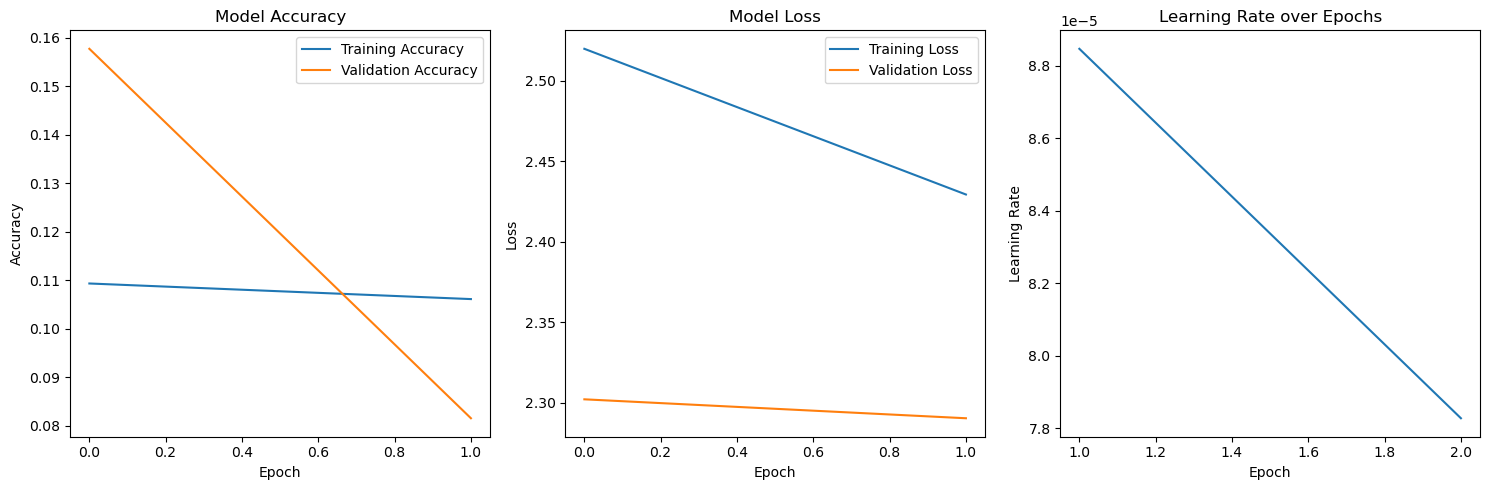

In [ ]:
def plot_training_history(history, learning_rates):

    # Plot training history and learning rate
    plt.figure(figsize=(15, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot learning rate
    plt.subplot(1, 3, 3)
    plt.plot(range(1, len(learning_rates) + 1), learning_rates, label='Learning Rate')
    plt.title('Learning Rate over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')

    plt.tight_layout()
    plt.show()

plot_training_history(history, learning_rates)

**Explanations:**

- This code defines a function `plot_training_history` that visualizes the training and validation accuracy and loss over epochs. It then applies this function to the training history of the augmented model.

**Why It Is Important:**

- Visualizing the training and validation metrics helps us understand how the model is learning over time. It allows us to identify potential issues such as overfitting (when training accuracy continues to improve but validation accuracy plateaus or decreases) or underfitting (when both training and validation accuracy are low and not improving). This information is crucial for deciding whether to adjust the model ptm_name, change hyperparameters, or modify the training process.

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### <a id='toc1_4_2_5_'></a>[**Test Trained Model**](#toc0_)

In [ ]:
def predict_image_class(model, img_path, class_names, target_size, preprocessing_function):
    target_size = target_size  # Get the target size for the chosen architecture
    preprocess_func = preprocessing_function  # Get the preprocessing function for the chosen architecture

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_func(img_array)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_index]
    confidence = predictions[0][predicted_class_index]

    return predicted_class, confidence

def visualize_prediction(img_path, target_size, predicted_class, confidence):
    img = image.load_img(img_path, target_size=target_size)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}")
    plt.show()

# Mount Google Drive if using Colab
try:
    from google.colab import drive
    drive.mount('/content/drive')
    DATASET_PATH = '/content/drive/MyDrive/Colab Notebooks/datasets/1703138137_dataset/part_1/dataset_hist_structures'
except ImportError:
    load_dotenv(verbose=True, dotenv_path='.env', override=True)
    DATASET_PATH = os.getenv('DATASET_PATH')

# Test the model on new images
test_image_paths = [
    f'{DATASET_PATH}/model_test_images/test-image-1.jpg',
    f'{DATASET_PATH}/model_test_images/test-image-2.jpg',
    f'{DATASET_PATH}/model_test_images/test-image-3.jpg',
]
print()
print("\nTesting model on new images:")
print()

for img_path in test_image_paths:
    predicted_class, confidence = predict_image_class(compiled_model, img_path, class_names, target_size, preprocessing_function)
    print()
    print(f"Image: {img_path}")
    print(f"Predicted class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}")
    print()

    # Visualize prediction
    visualize_prediction(img_path, target_size, predicted_class, confidence)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### <a id='toc1_4_2_3_'></a>[**Train The Model With Augmentation - v2**](#toc0_)

In [ ]:
# v2 - Needs Work - Need to incorporate changes from v1
#
import os
import warnings
from dotenv import load_dotenv
from typing import Dict, Tuple, List
import logging
from dataclasses import dataclass

import yaml
import numpy as np
import tensorflow as tf
from dotenv import load_dotenv
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import backend as K
from tensorflow.keras.applications import (
    EfficientNetB0,
    InceptionV3,
    MobileNetV2,
    ResNet50V2,
    VGG16,
)
from tensorflow.keras.callbacks import (
    Callback,
    EarlyStopping,
    LambdaCallback,
    LearningRateScheduler,
)
from tensorflow.keras.layers import (
    BatchNormalization,
    Dense,
    Dropout,
    GlobalAveragePooling2D,
    Input,
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Suppress warnings
warnings.filterwarnings("ignore")

# Load configuration
with open('config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

@dataclass
class ModelConfig:
    ptm_name: str
    input_shape: Tuple[int, int, int]

@dataclass
class TrainingConfig:
    batch_size: int
    initial_learning_rate: float
    epochs: int
    early_stopping_patience: int
    target_accuracy: float
    lr_epochs: int

model_config = ModelConfig(**config['model'])
training_config = TrainingConfig(**config['training'])

# Custom exceptions
class DatasetError(Exception):
    """Exception raised for errors in the dataset."""
    pass

class ModelError(Exception):
    """Exception raised for errors in the model creation or training."""
    pass

class AccuracyCallback(Callback):
    """Callback to stop training when a target accuracy is reached."""

    def __init__(self, target_accuracy: float):
        super().__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch: int, logs: Dict[str, float] = None) -> None:
        if logs.get('val_accuracy') >= self.target_accuracy:
            logger.info(f"\nReached {self.target_accuracy*100}% validation accuracy. Stopping training.")
            logger.info("\n--------------------\n")
            self.model.stop_training = True

class AugmentationCallback(Callback):
    """Callback to work with the CustomAugmentationLayer."""

    def __init__(self, train_generator: DataGenerator):
        super().__init__()
        self.train_generator = train_generator

    def on_batch_begin(self, batch: int, logs: Dict[str, float] = None) -> None:
        # You can add custom logic here if needed
        pass

class CustomValidationCallback(Callback):
    """Callback for custom validation after each epoch."""

    def __init__(self, validation_data: DataGenerator, validation_steps: int):
        super().__init__()
        self.validation_data = validation_data
        self.validation_steps = validation_steps

    def on_epoch_end(self, epoch: int, logs: Dict[str, float] = None) -> None:
        val_loss = 0
        val_accuracy = 0
        for i in range(self.validation_steps):
            x, y = next(self.validation_data.generator)
            val_metrics = self.model.test_on_batch(x, y)
            val_loss += val_metrics[0]
            val_accuracy += val_metrics[1]
        val_loss /= self.validation_steps
        val_accuracy /= self.validation_steps
        logs['val_loss'] = val_loss
        logs['val_accuracy'] = val_accuracy
        logger.info(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

class DatasetLogger(Callback):
    """Callback to log dataset information at the beginning of each epoch."""

    def __init__(self, train_generator: DataGenerator, val_generator: DataGenerator):
        super().__init__()
        self.train_generator = train_generator
        self.val_generator = val_generator

    def on_epoch_begin(self, epoch: int, logs: Dict[str, float] = None) -> None:
        logger.info(f"Epoch {epoch + 1} - Train samples: {len(self.train_generator.generator.classes)}")
        logger.info(f"Epoch {epoch + 1} - Val samples: {len(self.val_generator.generator.classes)}")
        logger.info("--------------------")

    def on_epoch_end(self, epoch: int, logs: Dict[str, float] = None) -> None:
        if logs is not None:
            logger.info(f"Epoch {epoch + 1} - Train accuracy: {logs.get('accuracy', 'N/A'):.4f}")
            logger.info(f"Epoch {epoch + 1} - Val accuracy: {logs.get('val_accuracy', 'N/A'):.4f}")
            logger.info("--------------------")

class DebugCallback(Callback):
    """Callback for debugging purposes, providing detailed information about the training process."""

    def on_epoch_begin(self, epoch: int, logs: Dict[str, float] = None) -> None:
        logger.info(f"\nStarting epoch {epoch + 1}")

    def on_batch_begin(self, batch: int, logs: Dict[str, float] = None) -> None:
        if batch % 50 == 0:
            logger.info(f"Starting batch {batch}")

    def on_epoch_end(self, epoch: int, logs: Dict[str, float] = None) -> None:
        logger.info(f"End of epoch {epoch + 1}")
        if logs:
            for key, value in logs.items():
                logger.info(f"{key}: {value}")
        logger.info("--------------------")

class LRLogger(Callback):
    def __init__(self):
        super().__init__()
        self.lrs = []

    def on_epoch_begin(self, epoch, logs=None):
        lr = float(K.get_value(self.model.optimizer.lr))
        self.lrs.append(lr)

class CustomAugmentationLayer(tf.keras.layers.Layer):
    """Custom augmentation layer for image preprocessing."""

    def call(self, inputs: tf.Tensor, training: bool = None) -> tf.Tensor:
        if training:
            augmented = tf.image.random_contrast(inputs, lower=0.8, upper=1.2)
            augmented = tf.image.random_saturation(augmented, lower=0.8, upper=1.2)
            return augmented
        return inputs

class DataGenerator(Sequence):
    """Custom data generator for feeding data to the model."""

    def __init__(self, generator, steps_per_epoch: int):
        self.generator = generator
        self.steps_per_epoch = steps_per_epoch

    def __len__(self) -> int:
        return self.steps_per_epoch

    def __getitem__(self, index: int) -> Tuple[np.ndarray, np.ndarray]:
        return next(self.generator)

    def on_epoch_end(self) -> None:
        self.generator.reset()

class LearningRateFinder:
    """Class to find the optimal learning rate."""

    def __init__(self, model: Model, stop_factor: float = 4, beta: float = 0.98):
        self.model = model
        self.stop_factor = stop_factor
        self.beta = beta
        self.lrs: List[float] = []
        self.losses: List[float] = []
        self.best_loss = float('inf')
        self.avg_loss = 0
        self.batch_num = 0
        self.weights_file = None

    def reset(self) -> None:
        """Reset the state of the learning rate finder."""
        self.lrs = []
        self.losses = []
        self.best_loss = float('inf')
        self.avg_loss = 0
        self.batch_num = 0
        self.weights_file = None

    def on_batch_end(self, batch: int, logs: Dict[str, float]) -> None:
        """Callback method to update learning rate and loss after each batch."""
        lr = self.model.optimizer.lr
        if hasattr(lr, 'numpy'):
            lr = lr.numpy()
        self.lrs.append(lr)

        loss = logs["loss"]
        self.batch_num += 1
        self.avg_loss = (self.beta * self.avg_loss) + ((1 - self.beta) * loss)
        smooth = self.avg_loss / (1 - (self.beta ** self.batch_num))
        self.losses.append(smooth)

        stop_loss = self.stop_factor * self.best_loss

        if self.batch_num > 1 and smooth < self.best_loss:
            self.best_loss = smooth

        if smooth > stop_loss:
            self.model.stop_training = True

        if self.batch_num % 100 == 0:
            logger.info(f"Batch {self.batch_num}: lr = {lr:.6f}, loss = {smooth:.4f}")

    def find(self, train_data: DataGenerator, start_lr: float, end_lr: float, batch_size: int = 32, epochs: int = 5) -> None:
        """Find the optimal learning rate."""
        self.reset()
        num_samples = len(train_data.generator.classes)
        steps_per_epoch = int(np.ceil(num_samples / batch_size))

        self.weights_file = "lrf_weights.h5"
        self.model.save_weights(self.weights_file)

        orig_lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, start_lr)

        logger.info(f"Starting Learning Rate Finder: LR range {start_lr} to {end_lr}")

        lr_schedule = lambda epoch, batch: start_lr * (end_lr / start_lr) ** (batch / (epochs * steps_per_epoch))

        callback = LambdaCallback(on_batch_end=lambda batch, logs: self.on_batch_end(batch, logs))
        self.model.fit(
            train_data.generator,
            steps_per_epoch=steps_per_epoch,
            epochs=epochs,
            callbacks=[callback, LearningRateScheduler(lr_schedule)],
            verbose=0
        )

        logger.info("Learning Rate Finder complete")

        self.model.load_weights(self.weights_file)
        K.set_value(self.model.optimizer.lr, orig_lr)

    def plot_loss(self) -> None:
        """Plot the loss against the learning rate."""
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 6))
        plt.plot(self.lrs, self.losses)
        plt.xscale("log")
        plt.xlabel("Learning rate")
        plt.ylabel("Loss")
        plt.title("Learning Rate vs. Loss")
        plt.show()

    def get_best_lr(self) -> float:
        """Get the best learning rate based on the minimum gradient of the loss curve."""
        min_grad_idx = np.argmin(np.gradient(np.array(self.losses)))
        return self.lrs[min_grad_idx]

    def print_results(self) -> None:
        """Print the results of the learning rate finder."""
        logger.info("\nLearning Rate Finder Results:")
        logger.info(f"Minimum loss: {min(self.losses):.4f}")
        logger.info(f"Maximum loss: {max(self.losses):.4f}")
        logger.info(f"Learning rate range: {min(self.lrs):.6f} to {max(self.lrs):.6f}")

def count_samples(dataset_path: str) -> Dict[str, int]:
    """
    Count the number of samples in each class of the dataset.

    Args:
        dataset_path (str): Path to the dataset directory.

    Returns:
        Dict[str, int]: Dictionary with class names as keys and sample counts as values.
    """
    class_counts = {}
    try:
        for class_name in os.listdir(dataset_path):
            class_path = os.path.join(dataset_path, class_name)
            if os.path.isdir(class_path):
                class_counts[class_name] = len(os.listdir(class_path))
    except OSError as e:
        raise DatasetError(f"Error reading dataset directory: {e}")
    return class_counts

def create_model(num_classes: int, ptm_name: callable, input_shape: Tuple[int, int, int]) -> Model:
    """
    Create a transfer learning model based on the given ptm_name.

    Args:
        num_classes (int): Number of classes in the dataset.
        ptm_name (callable): Base model ptm_name (e.g., ResNet50V2).
        input_shape (Tuple[int, int, int]): Input shape for the model.

    Returns:
        Model: Compiled Keras model.
    """
    base_model = ptm_name(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )

    for layer in base_model.layers:
        layer.trainable = False

    inputs = Input(shape=input_shape)
    x = CustomAugmentationLayer()(inputs)
    x = base_model(x)
    x = BatchNormalization()(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = Dropout(0.5)(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)

    output = Dense(num_classes, activation='softmax')(x)

    return Model(inputs=inputs, outputs=output)

def compile_model(model: Model, learning_rate: float) -> Model:
    """
    Compile the model with the given learning rate.

    Args:
        model (Model): The model to compile.
        learning_rate (float): The initial learning rate.

    Returns:
        Model: Compiled Keras model.
    """
    lr_schedule = ExponentialDecay(
        learning_rate,
        decay_steps=100,
        decay_rate=0.96,
        staircase=True)

    optimizer = Adam(learning_rate=lr_schedule)

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        steps_per_execution=8
    )
    return model

def create_data_generators(train_path: str, test_path: str, batch_size: int, target_size: Tuple[int, int], preprocessing_function: callable) -> Tuple[DataGenerator, DataGenerator, int, int]:
    """
    Create data generators for training and testing.

    Args:
        train_path (str): Path to the training data.
        test_path (str): Path to the test data.
        batch_size (int): Batch size for training.
        target_size (Tuple[int, int]): Target size for the input images.
        preprocessing_function (callable): Preprocessing function for the images.

    Returns:
        Tuple[DataGenerator, DataGenerator, int, int]: Train generator, test generator, steps per epoch, and validation steps.
    """
    train_datagen = ImageDataGenerator(
        preprocessing_function=preprocessing_function,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        zoom_range=0.2,
        shear_range=0.2,
        fill_mode='nearest'
    )
    test_datagen = ImageDataGenerator(preprocessing_function=preprocessing_function)

    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
    )

    test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

    steps_per_epoch = len(train_generator)
    validation_steps = len(test_generator)

    return DataGenerator(train_generator, steps_per_epoch), DataGenerator(test_generator, validation_steps), steps_per_epoch, validation_steps

def lr_schedule(epoch: int, lr: float) -> float:
    """
    Learning rate schedule function.

    Args:
        epoch (int): Current epoch number.
        lr (float): Current learning rate.

    Returns:
        float: Updated learning rate.
    """
    if epoch < 100:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

from typing import Dict, Any

def validate_config(config: Dict[str, Any], valid_ptm_names: Dict[str, callable]) -> None:
    """
    Validate the entire configuration.

    Args:
        config (Dict[str, Any]): The entire configuration dictionary.
        valid_ptm_names (Dict[str, callable]): Dictionary of valid ptm_name names and their corresponding functions.

    Raises:
        ValueError: If any configuration parameter is invalid.
    """
    # Validate model configuration
    validate_model_config(config.get('model', {}), valid_ptm_names)

    # Validate training configuration
    validate_training_config(config.get('training', {}))

    # Validate data configuration
    validate_data_config(config.get('data', {}))

def validate_model_config(model_config: Dict[str, Any], valid_ptm_names: Dict[str, callable]) -> None:
    """Validate the model configuration."""
    if 'ptm_name' not in model_config:
        raise ValueError("Model configuration must include 'ptm_name'")

    ptm_name = model_config['ptm_name']
    if ptm_name not in valid_ptm_names:
        raise ValueError(f"Invalid ptm_name: {ptm_name}. Valid options are: {', '.join(valid_ptm_names.keys())}")

def validate_training_config(training_config: Dict[str, Any]) -> None:
    """Validate the training configuration."""
    required_fields = ['batch_size', 'initial_learning_rate', 'epochs', 'early_stopping_patience', 'target_accuracy']
    for field in required_fields:
        if field not in training_config:
            raise ValueError(f"Training configuration must include '{field}'")

    if training_config['batch_size'] <= 0:
        raise ValueError(f"Invalid batch size: {training_config['batch_size']}. Must be a positive integer.")

    if training_config['initial_learning_rate'] <= 0:
        raise ValueError(f"Invalid initial learning rate: {training_config['initial_learning_rate']}. Must be a positive float.")

    if training_config['epochs'] <= 0:
        raise ValueError(f"Invalid number of epochs: {training_config['epochs']}. Must be a positive integer.")

    if training_config['early_stopping_patience'] < 0:
        raise ValueError(f"Invalid early stopping patience: {training_config['early_stopping_patience']}. Must be a non-negative integer.")

    if not 0 < training_config['target_accuracy'] <= 1:
        raise ValueError(f"Invalid target accuracy: {training_config['target_accuracy']}. Must be between 0 and 1.")

def validate_data_config(data_config: Dict[str, Any]) -> None:
    """Validate the data configuration."""
    required_fields = ['train_path', 'test_path']
    for field in required_fields:
        if field not in data_config:
            raise ValueError(f"Data configuration must include '{field}'")

    if not os.path.exists(data_config['train_path']):
        raise ValueError(f"Train path does not exist: {data_config['train_path']}")

    if not os.path.exists(data_config['test_path']):
        raise ValueError(f"Test path does not exist: {data_config['test_path']}")

def main(find_lr: bool = True, pretrain_model_eval: bool = True):
    """
    Main function to run the training pipeline.

    Args:
        find_lr (bool): Whether to find the optimal learning rate.
        pretrain_model_eval (bool): Whether to evaluate the model before training.
    """
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        load_dotenv(verbose=True, dotenv_path='.env', override=True)
        DATASET_PATH = os.getenv('COLAB_DATASET_PATH')
    except ImportError:
        load_dotenv(verbose=True, dotenv_path='.env', override=True)
        DATASET_PATH = os.getenv('DATASET_PATH')

    PT_MODELS = {
        'ResNet50V2': ResNet50V2,
        'VGG16': VGG16,
        'InceptionV3': InceptionV3,
        'MobileNetV2': MobileNetV2,
        'EfficientNetB0': EfficientNetB0
    }

    PTM_INPUT_SHAPES = {
        'ResNet50V2': (128, 128, 3),
        'VGG16': (224, 224, 3),
        'InceptionV3': (299, 299, 3),
        'MobileNetV2': (224, 224, 3),
        'EfficientNetB0': (224, 224, 3)
    }

    PTM_PREPROC_FUNCS = {
        'ResNet50V2': tf.keras.applications.resnet_v2.preprocess_input,
        'VGG16': tf.keras.applications.vgg16.preprocess_input,
        'InceptionV3': tf.keras.applications.inception_v3.preprocess_input,
        'MobileNetV2': tf.keras.applications.mobilenet_v2.preprocess_input,
        'EfficientNetB0': tf.keras.applications.efficientnet.preprocess_input
    }

    # Load configuration
    with open('config.yaml', 'r') as config_file:
        config = yaml.safe_load(config_file)

    # Validate the entire configuration
    try:
        validate_config(config, PT_MODELS)
    except ValueError as e:
        logger.error(f"Configuration error: {e}")
        return

    # Extract configuration values
    model_config = config['model']
    training_config = config['training']
    data_config = config['data']

    ptm_name = PT_MODELS[model_config['ptm_name']]
    input_shape = PTM_INPUT_SHAPES[ptm_name.__name__]
    target_size = input_shape[:2]
    preprocessing_function = PTM_PREPROC_FUNCS[ptm_name.__name__]

    train_path = os.path.join(DATASET_PATH, data_config['train_path'])
    test_path = os.path.join(DATASET_PATH, data_config['test_path'])

    try:
        train_counts = count_samples(train_path)
        test_counts = count_samples(test_path)
    except DatasetError as e:
        logger.error(f"Error in dataset: {e}")
        return

    logger.info(f"TensorFlow version: {tf.__version__}")
    logger.info(f"Eager execution: {tf.executing_eagerly()}")

    logger.info("\nTraining samples per class:")
    for class_name, count in sorted(train_counts.items()):
        logger.info(f"{class_name}: {count}")

    logger.info("\nTest samples per class:")
    for class_name, count in sorted(test_counts.items()):
        logger.info(f"{class_name}: {count}")

    num_classes = len(train_counts)
    model = create_model(num_classes, ptm_name, input_shape)

    logger.info(f"Using {ptm_name.__name__} ptm_name")
    model.summary()

    train_generator, test_generator, steps_per_epoch, validation_steps = create_data_generators(
        train_path, test_path, batch_size=training_config.batch_size, target_size=target_size, preprocessing_function=preprocessing_function)

    logger.info(f"Steps per epoch: {steps_per_epoch}")
    logger.info(f"Validation steps: {validation_steps}")

    compiled_model = compile_model(model, learning_rate=training_config.initial_learning_rate)

    if find_lr:
        logger.info("Finding optimal learning rate...")
        lr_finder = LearningRateFinder(compiled_model)
        lr_finder.find(train_generator, start_lr=1e-7, end_lr=1, epochs=training_config.lr_epochs)
        lr_finder.plot_loss()
        lr_finder.print_results()
        best_lr = lr_finder.get_best_lr()
        logger.info(f"Best initial learning rate: {best_lr}")
        logger.info("Recompiling model with best learning rate...")
        compiled_model = compile_model(model, learning_rate=best_lr)
    else:
        best_lr = training_config.initial_learning_rate

    accuracy_callback = AccuracyCallback(target_accuracy=training_config.target_accuracy)
    debug_callback = DebugCallback()
    early_stopping = EarlyStopping(monitor='val_loss', patience=training_config.early_stopping_patience, restore_best_weights=True)
    dataset_logger = DatasetLogger(train_generator, test_generator)
    custom_validation = CustomValidationCallback(test_generator, validation_steps)
    augmentation_callback = AugmentationCallback(train_generator)
    lr_callback = LearningRateScheduler(lr_schedule)
    lr_logger = LRLogger()

    class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.generator.classes), y=train_generator.generator.classes)
    class_weight_dict = dict(enumerate(class_weights))

    if pretrain_model_eval:
        logger.info("Evaluating model before training:")
        evaluation = compiled_model.evaluate(test_generator.generator, steps=validation_steps)
        logger.info(f"Initial evaluation: {evaluation}")

    try:
        history = compiled_model.fit(
            train_generator.generator,
            steps_per_epoch=steps_per_epoch,
            epochs=training_config.epochs,
            validation_data=test_generator.generator,
            validation_steps=validation_steps,
            callbacks=[
                accuracy_callback,
                debug_callback,
                early_stopping,
                dataset_logger,
                custom_validation,
                augmentation_callback,
                lr_callback,
                lr_logger
            ],
            class_weight=class_weight_dict,
            verbose=1
        )

    except tf.errors.ResourceExhaustedError:
        logger.error("Memory error occurred. Try reducing batch size or image dimensions.")
    except Exception as e:
        logger.error(f"An error occurred during training: {e}")
        import traceback
        logger.error(traceback.format_exc())

    logger.info("Final evaluation:")
    final_evaluation = compiled_model.evaluate(test_generator.generator, steps=validation_steps)
    logger.info(f"Final evaluation: {final_evaluation}")

# if __name__ == "__main__":
#     main()

#### <a id='toc1_4_2_4_'></a>[**Visualize Training And Validation Accuracy**](#toc0_)

#### <a id='toc1_4_2_4_'></a>[**Test Trained Model**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

### <a id='toc1_4_1_'></a>[**Part 2 - Data Science**](#toc0_)

### <a id='toc1_4_3_'></a>[**Data Analysis**](#toc0_)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

DATASET_PATH = '/Users/toddwalters/Development/data/1703138137_dataset/part_2'

# Load the datasets
user_df = pd.read_csv(f'{DATASET_PATH}/user.csv')
tourism_df = pd.read_excel(f'{DATASET_PATH}/tourism_with_id.xlsx')
ratings_df = pd.read_csv(f'{DATASET_PATH}/tourism_rating.csv')

# Task 1: Preliminary inspections
print("1. Preliminary Inspections")

## Check for missing values
print("Missing values:")
print("User data:\n", user_df.isnull().sum())
print("\nTourism data:\n", tourism_df.isnull().sum())
print("\nRatings data:\n", ratings_df.isnull().sum())

## Check for duplicates
print("\nDuplicates:")
print("User data:", user_df.duplicated().sum())
print("Tourism data:", tourism_df.duplicated().sum())
print("Ratings data:", ratings_df.duplicated().sum())

# Task 2: Explore user group providing tourism ratings
print("\n2. User Group Analysis")

## Analyze age distribution
plt.figure(figsize=(10, 6))
sns.histplot(user_df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Identify places where most users are coming from
top_locations = user_df['Location'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_locations.plot(kind='bar')
plt.title('Top 10 User Locations')
plt.xlabel('Location')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Task 3: Explore locations and categories of tourist spots
print("\n3. Tourist Spot Analysis")

## Different categories of tourist spots
print("Categories of Tourist Spots:")
print(tourism_df['Category'].value_counts())

## Analyze tourism types by location
location_category = tourism_df.groupby('City')['Category'].value_counts().unstack()
location_category_norm = location_category.div(location_category.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
location_category_norm.plot(kind='bar', stacked=True)
plt.title('Tourism Categories by City')
plt.xlabel('City')
plt.ylabel('Proportion of Categories')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Identify best city for nature enthusiasts
nature_spots = tourism_df[tourism_df['Category'] == 'Nature']
nature_by_city = nature_spots.groupby('City').size().sort_values(ascending=False)
print("Best Cities for Nature Enthusiasts:")
print(nature_by_city)

# Task 4: Analyze combined data with places and user ratings
print("\n4. Combined Data Analysis")

## Merge tourism and ratings data
combined_data = pd.merge(tourism_df, ratings_df, on='Place_Id')

## Find spots most loved by tourists
top_spots = combined_data.groupby('Place_Name')['Place_Ratings'].mean().sort_values(ascending=False).head(10)
print("Top 10 Most Loved Tourist Spots:")
print(top_spots)

## Find city with most loved tourist spots
city_ratings = combined_data.groupby('City')['Place_Ratings'].mean().sort_values(ascending=False)
print("\nCities with Most Loved Tourist Spots:")
print(city_ratings)

## Analyze which categories users like most
category_ratings = combined_data.groupby('Category')['Place_Ratings'].mean().sort_values(ascending=False)
print("\nMost Liked Categories:")
print(category_ratings)

plt.figure(figsize=(10, 6))
category_ratings.plot(kind='bar')
plt.title('Average Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Task 5: Build a recommender model
print("\n5. Recommender Model")

## Create a pivot table for user-item ratings
user_item_matrix = combined_data.pivot_table(index='User_Id', columns='Place_Name', values='Place_Ratings')

## Fill NaN values with 0
user_item_matrix = user_item_matrix.fillna(0)

## Calculate cosine similarity between items
item_similarity = cosine_similarity(user_item_matrix.T)

## Create a DataFrame from the item similarity matrix
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

def get_similar_places(place_name, user_rating):
    similar_places = item_similarity_df[place_name] * (user_rating - 2.5)
    similar_places = similar_places.sort_values(ascending=False)
    return similar_places

## Example recommendation
place_name = "Monumen Nasional"  # You can change this to any place name
user_rating = 5  # You can change this to any rating

print("Recommendations based on", place_name, "with a rating of", user_rating)
print(get_similar_places(place_name, user_rating).head(5))

# Additional insights
print("\nAdditional Insights:")

## User activity analysis
user_activity = ratings_df.groupby('User_Id')['Place_Ratings'].count().sort_values(ascending=False)
print("\nTop 10 Most Active Users:")
print(user_activity.head(10))

## Rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['Place_Ratings'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## Correlation between place features and ratings
if 'Time_Minutes' in tourism_df.columns and 'Price' in tourism_df.columns:
    feature_ratings = pd.merge(tourism_df[['Place_Id', 'Time_Minutes', 'Price']],
                               ratings_df[['Place_Id', 'Place_Ratings']],
                               on='Place_Id')
    correlation_matrix = feature_ratings[['Time_Minutes', 'Price', 'Place_Ratings']].corr()
    print("\nCorrelation between features and ratings:")
    print(correlation_matrix['Place_Ratings'])

print("\nAnalysis Complete!")

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### <a id='toc1_4_3_1_'></a>[**4.3.1. Data Analysis v2**](#toc0_)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Markdown cell
"""
# Tourism Data Analysis and Recommendation Engine Project

## Project Context
This project aims to analyze tourism data in Indonesia's five largest cities, comprehend and predict the demand for various tourist attractions, and build a recommendation system based on user ratings.

## Project Objectives
1. Analyze user demographics and locations
2. Explore tourist spot categories and locations
3. Analyze user ratings and popular spots
4. Build a recommendation system
5. Forecast ratings using machine learning and deep learning algorithms

## Dataset Description
- user.csv: Contains user demographic data
- tourism_with_id.csv: Provides details on tourist attractions
- tourism_rating.csv: Contains user ratings for tourist spots
"""

# 4.1 Preliminary analysis
# 4.1.1 Import the datasets into the Python environment
user_df = pd.read_csv('user.csv')
tourism_df = pd.read_csv('tourism_with_id.csv')
ratings_df = pd.read_csv('tourism_rating.csv')

# 4.1.2 Examine the dataset's shape and structure, and look out for any outlier
print("User dataset shape:", user_df.shape)
print("Tourism dataset shape:", tourism_df.shape)
print("Ratings dataset shape:", ratings_df.shape)

user_df.info()
tourism_df.info()
ratings_df.info()

# Check for missing values and duplicates
for df, name in zip([user_df, tourism_df, ratings_df], ['User', 'Tourism', 'Ratings']):
    print(f"\nMissing values in {name} dataset:")
    print(df.isnull().sum())
    print(f"Duplicates in {name} dataset: {df.duplicated().sum()}")

# 4.1.3 Merge the datasets
merged_df = pd.merge(ratings_df, tourism_df, on='Place_Id')
merged_df = pd.merge(merged_df, user_df, on='User_Id')

# Markdown cell
"""
## 4.2 Exploratory Data Analysis

### 4.2.1 Examine the overall date wise ratings
"""

merged_df['date'] = pd.to_datetime(merged_df['date'])
daily_ratings = merged_df.groupby('date')['Place_Ratings'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_ratings['date'], daily_ratings['Place_Ratings'])
plt.title('Average Daily Ratings Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.show()

# Markdown cell
"""
### 4.2.2 Rating fluctuations across different days of the week
"""

merged_df['day_of_week'] = merged_df['date'].dt.day_name()
day_of_week_ratings = merged_df.groupby('day_of_week')['Place_Ratings'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_of_week_ratings.plot(kind='bar')
plt.title('Average Ratings by Day of Week')
plt.ylabel('Average Rating')
plt.show()

# Markdown cell
"""
### 4.2.3 Rating trends for different months of the year
"""

merged_df['month'] = merged_df['date'].dt.month_name()
monthly_ratings = merged_df.groupby('month')['Place_Ratings'].mean()
monthly_ratings.plot(kind='bar')
plt.title('Average Ratings by Month')
plt.ylabel('Average Rating')
plt.show()

# Markdown cell
"""
### 4.2.4 Rating distribution across different quarters
"""

merged_df['quarter'] = merged_df['date'].dt.quarter
quarterly_ratings = merged_df.groupby('quarter')['Place_Ratings'].mean()
quarterly_ratings.plot(kind='bar')
plt.title('Average Ratings by Quarter')
plt.ylabel('Average Rating')
plt.show()

# Markdown cell
"""
### 4.2.5 Compare performances of different tourist spots
"""

spot_performance = merged_df.groupby('Place_Name')['Place_Ratings'].agg(['mean', 'count']).sort_values('mean', ascending=False)
print(spot_performance.head(10))

# Markdown cell
"""
### 4.2.6 Identify most popular tourist spots and their locations
"""

popular_spots = merged_df.groupby(['Place_Name', 'City'])['Place_Ratings'].agg(['mean', 'count']).sort_values('count', ascending=False)
print("Most popular tourist spots overall:")
print(popular_spots.head(10))

# For each city
for city in merged_df['City'].unique():
    city_spots = merged_df[merged_df['City'] == city].groupby('Place_Name')['Place_Ratings'].agg(['mean', 'count']).sort_values('count', ascending=False)
    print(f"\nMost popular spot in {city}:")
    print(city_spots.head(1))

# Markdown cell
"""
### 4.2.7 Determine if the spot with highest visit count has the highest average rating
"""

spot_metrics = merged_df.groupby('Place_Name').agg({
    'Place_Ratings': 'mean',
    'User_Id': 'count'  # Using User_Id count as a proxy for visit count
}).rename(columns={'User_Id': 'visit_count'})

top_by_visits = spot_metrics.sort_values('visit_count', ascending=False).head(1)
top_by_rating = spot_metrics.sort_values('Place_Ratings', ascending=False).head(1)

print("Top spot by visit count:")
print(top_by_visits)
print("\nTop spot by average rating:")
print(top_by_rating)

# Markdown cell
"""
### 4.2.8 Identify the highest rated spot in each category and its visit count
"""

category_top_spots = merged_df.groupby(['Category', 'Place_Name']).agg({
    'Place_Ratings': 'mean',
    'User_Id': 'count'  # Using User_Id count as a proxy for visit count
}).rename(columns={'User_Id': 'visit_count'})

for category in category_top_spots.index.get_level_values('Category').unique():
    top_spot = category_top_spots.loc[category].sort_values('Place_Ratings', ascending=False).head(1)
    print(f"\nHighest rated spot in {category}:")
    print(top_spot)

# Markdown cell
"""
## 4.3 Building a Recommendation System

We'll use a simple collaborative filtering approach based on user-item interactions.
"""

# Create a user-item matrix
user_item_matrix = merged_df.pivot_table(index='User_Id', columns='Place_Name', values='Place_Ratings')

# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix.fillna(0))

# Function to get recommendations for a user
def get_recommendations(user_id, n=5):
    user_index = user_item_matrix.index.get_loc(user_id)
    similar_users = user_similarity[user_index].argsort()[::-1][1:11]  # top 10 similar users

    similar_users_ratings = user_item_matrix.iloc[similar_users]
    user_ratings = user_item_matrix.loc[user_id]

    recommendations = (similar_users_ratings.mean() - user_ratings).sort_values(ascending=False)
    return recommendations.head(n)

# Example recommendation
example_user = user_item_matrix.index[0]
print(f"Recommendations for user {example_user}:")
print(get_recommendations(example_user))

# Markdown cell
"""
## 4.4 Forecasting using Deep Learning Algorithms

We'll use an LSTM model to forecast future ratings for a specific tourist spot.
"""

# Choose a popular tourist spot for forecasting
popular_spot = popular_spots.index[0][0]
spot_ratings = merged_df[merged_df['Place_Name'] == popular_spot].set_index('date')['Place_Ratings']

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_ratings = scaler.fit_transform(spot_ratings.values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_ratings, seq_length)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build and train LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(spot_ratings.index[-len(y_test):], y_test, label='Actual')
plt.plot(spot_ratings.index[-len(y_pred):], y_pred, label='Predicted')
plt.title(f'Rating Forecast for {popular_spot}')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.legend()
plt.show()

# Markdown cell
"""
## Conclusions and Recommendations

[Add your conclusions and recommendations based on the analysis]
"""

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### <a id='toc1_4_3_1_1_'></a>[**4.3.1.1. Generate necessary features for the development of these models, like day of the week, quarter of the year, month, year, day of the month and so on**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### <a id='toc1_4_3_1_2_'></a>[**4.3.1.2. Use the data from the last six months as the testing data**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### <a id='toc1_4_3_1_3_'></a>[**4.3.1.3. Compute the root mean square error (RMSE) values for each model to compare their performances**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### <a id='toc1_4_3_1_4_'></a>[**4.3.1.4. Use the best-performing models to make a forecast for the next year**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

### <a id='toc1_4_4_'></a>[**4.4. Forecasting using deep learning algorithms**](#toc0_)

#### <a id='toc1_4_4_1_'></a>[**4.4.1. Use sales amount for predictions instead of item count**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### <a id='toc1_4_4_2_'></a>[**4.4.2. Build a long short-term memory (LSTM) model for predictions**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### <a id='toc1_4_4_2_1_'></a>[**4.4.2.1. Define the train and test series**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### <a id='toc1_4_4_2_2_'></a>[**4.4.2.2. Generate synthetic data for the last 12 months**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### <a id='toc1_4_4_2_3_'></a>[**4.4.2.3. Build and train an LSTM model**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### <a id='toc1_4_4_2_4_'></a>[**4.4.2.4. Use the model to make predictions for the test data**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### <a id='toc1_4_4_3_'></a>[**4.4.3. Calculate the mean absolute percentage error (MAPE) and comment on the model's performance**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### <a id='toc1_4_4_4_'></a>[**4.4.4. Develop another model using the entire series for training, and use it to forecast for the next three months**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]